In [2]:
from PIL import Image, ImageEnhance

# 读取图片
image_path = 'qr_sample.png'
image = Image.open(image_path)

In [3]:
# %pip install opencv-python-headless
import cv2
import numpy as np

def read_qr_code(image: Image):
    image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
    detector = cv2.QRCodeDetector()  
    data, bbox, _ = detector.detectAndDecode(image)
    if data:
        print(f"Can read this code, Data: {data}")
        return True
    else:
        print("can not detect the QR code") 
        return False

Can read this code, Data: https://github.com/ghelia/prj-sony-thesis-phase9/issues/174


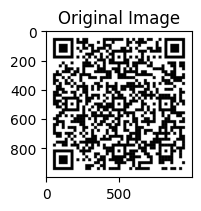

Can read this code, Data: https://github.com/ghelia/prj-sony-thesis-phase9/issues/174


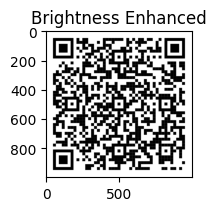

Can read this code, Data: https://github.com/ghelia/prj-sony-thesis-phase9/issues/174


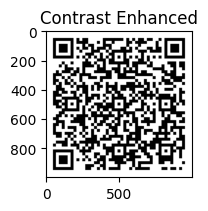

Can read this code, Data: https://github.com/ghelia/prj-sony-thesis-phase9/issues/174


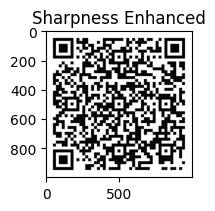

Can read this code, Data: https://github.com/ghelia/prj-sony-thesis-phase9/issues/174


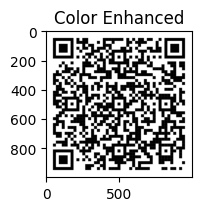

can not detect the QR code


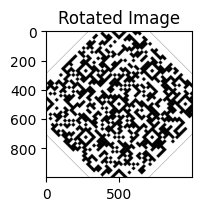

In [4]:
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt

# 显示原始图片
# plt.figure(figsize=(10, 10))
plt.subplot(231), plt.title('Original Image'), plt.imshow(image)
read_qr_code(image)
plt.show()

# 1. 调整亮度
enhancer = ImageEnhance.Brightness(image)
bright_image = enhancer.enhance(1.5)  # 增加亮度
plt.subplot(232), plt.title('Brightness Enhanced'), plt.imshow(bright_image)
read_qr_code(bright_image)
plt.show()

# 2. 调整对比度
enhancer = ImageEnhance.Contrast(image)
contrast_image = enhancer.enhance(1.5)  # 增加对比度
plt.subplot(233), plt.title('Contrast Enhanced'), plt.imshow(contrast_image)
read_qr_code(contrast_image)
plt.show()

# 3. 调整锐度
enhancer = ImageEnhance.Sharpness(image)
sharp_image = enhancer.enhance(2.0)  # 增加锐度
plt.subplot(234), plt.title('Sharpness Enhanced'), plt.imshow(sharp_image)
read_qr_code(sharp_image)
plt.show()

# 4. 调整颜色
enhancer = ImageEnhance.Color(image)
color_image = enhancer.enhance(2.0)  # 增加颜色饱和度
plt.subplot(235), plt.title('Color Enhanced'), plt.imshow(color_image)
read_qr_code(color_image)
plt.show()

# 5. 调整图片的旋转
rotated_image = image.rotate(45)  # 旋转45度
plt.subplot(236), plt.title('Rotated Image'), plt.imshow(rotated_image)
read_qr_code(rotated_image)
plt.show()

# Albumentations

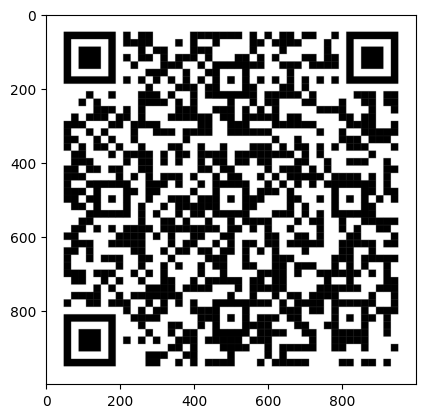

In [5]:
import albumentations as A 
np_image = np.array(image)
plt.imshow(np_image)

# Blur

Can read this code, Data: https://github.com/ghelia/prj-sony-thesis-phase9/issues/174


True

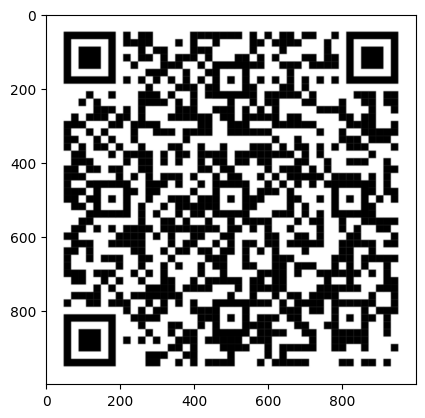

In [6]:
# Blur 
aug = A.Blur(blur_limit=3, p=1)(image=np_image)['image']
plt.imshow(aug)
read_qr_code(Image.fromarray(aug))

Can read this code, Data: https://github.com/ghelia/prj-sony-thesis-phase9/issues/174
Can read this code, Data: https://github.com/ghelia/prj-sony-thesis-phase9/issues/174
can not detect the QR code
Can read this code, Data: https://github.com/ghelia/prj-sony-thesis-phase9/issues/174


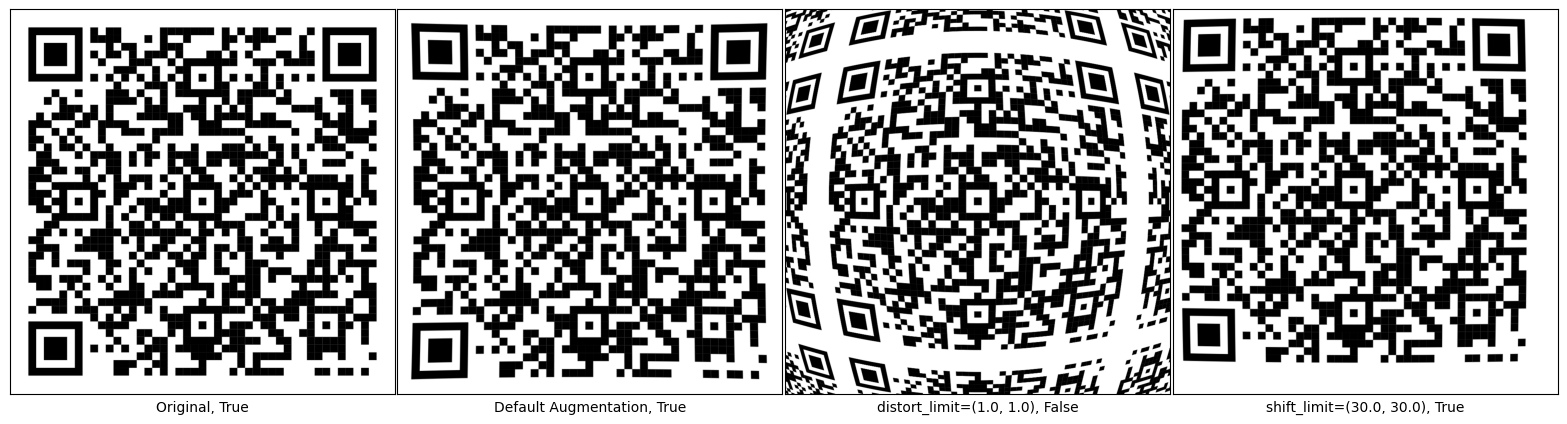

In [7]:
# OpticalDistortion
aug = []
n = 3
param1 = (1.0, 1.0)
param2 = (30.0, 30.0)
aug.append(A.Compose([A.OpticalDistortion(p=1)]))
aug.append(A.Compose([A.OpticalDistortion(distort_limit=param1, p=1)]))
aug.append(A.Compose([A.OpticalDistortion(shift_limit=param2, p=1)]))
aug_img = [aug[i](image=np_image) for i in range(n)]

fig, ax = plt.subplots(1, 1+n, figsize=(5+5*n, 5))
plt.subplots_adjust(wspace=0)
plt.rcParams["font.size"] = 18
[ax[i].tick_params(bottom=False, left=False, right=False, top=False, labelbottom=False, labelleft=False, labelright=False, labeltop=False) for i in range(1+n)]

ax[0].set_xlabel("Original, {}".format(read_qr_code(Image.fromarray(np_image))))
ax[1].set_xlabel("Default Augmentation, {}".format(read_qr_code(Image.fromarray(aug_img[0]['image']))))
ax[2].set_xlabel("distort_limit={}, {}".format(param1, read_qr_code(Image.fromarray(aug_img[1]['image']))))
ax[3].set_xlabel("shift_limit={}, {}".format(param2, read_qr_code(Image.fromarray(aug_img[2]['image']))))

ax[0].imshow(np_image)
[ax[i+1].imshow(aug_img[i]['image']) for i in range(n)]

# GridDistortion 

Can read this code, Data: https://github.com/ghelia/prj-sony-thesis-phase9/issues/174
can not detect the QR code
can not detect the QR code
Can read this code, Data: https://github.com/ghelia/prj-sony-thesis-phase9/issues/174


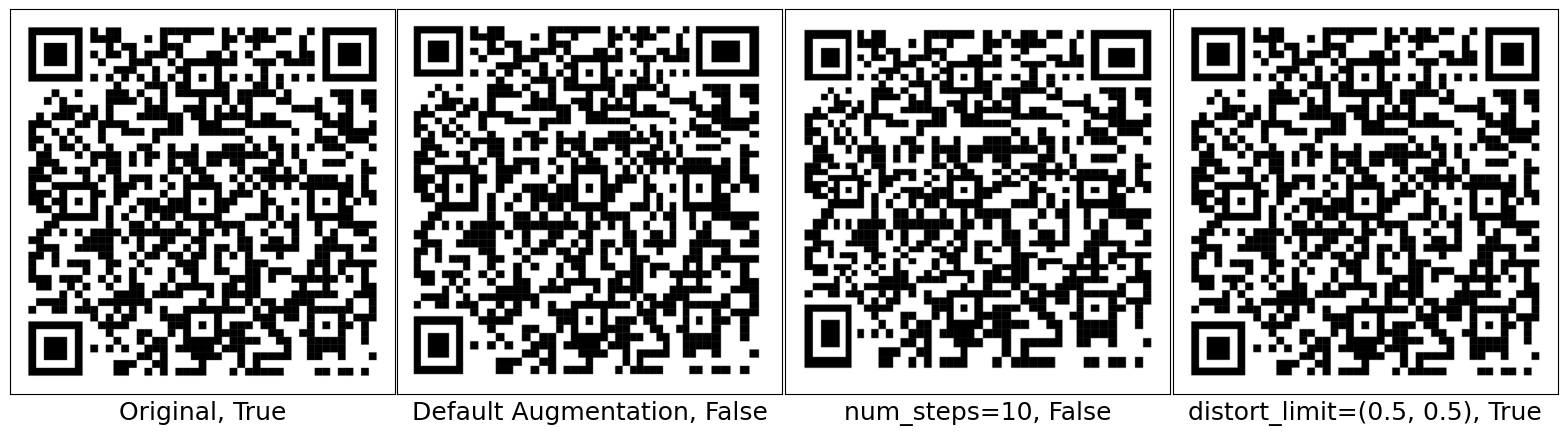

In [8]:
# GridDistortion
aug = []
n = 3
param1 = 10
param2 = (0.5, 0.5)
aug.append(A.Compose([A.GridDistortion(p=1)]))
aug.append(A.Compose([A.GridDistortion(num_steps=param1, p=1)]))
aug.append(A.Compose([A.GridDistortion(distort_limit=param2, p=1)]))
aug_img = [aug[i](image=np_image) for i in range(n)]

fig, ax = plt.subplots(1, 1+n, figsize=(5+5*n, 5))
plt.subplots_adjust(wspace=0)
plt.rcParams["font.size"] = 18
[ax[i].tick_params(bottom=False, left=False, right=False, top=False, labelbottom=False, labelleft=False, labelright=False, labeltop=False) for i in range(1+n)]

ax[0].set_xlabel("Original, {}".format(read_qr_code(Image.fromarray(np_image))))
ax[1].set_xlabel("Default Augmentation, {}".format(read_qr_code(Image.fromarray(aug_img[0]['image']))))
ax[2].set_xlabel("num_steps={}, {}".format(param1, read_qr_code(Image.fromarray(aug_img[1]['image']))))
ax[3].set_xlabel("distort_limit={}, {}".format(param2, read_qr_code(Image.fromarray(aug_img[2]['image']))))

ax[0].imshow(np_image)	
[ax[i+1].imshow(aug_img[i]['image']) for i in range(n)]

Can read this code, Data: https://github.com/ghelia/prj-sony-thesis-phase9/issues/174
Can read this code, Data: https://github.com/ghelia/prj-sony-thesis-phase9/issues/174
can not detect the QR code
can not detect the QR code
can not detect the QR code


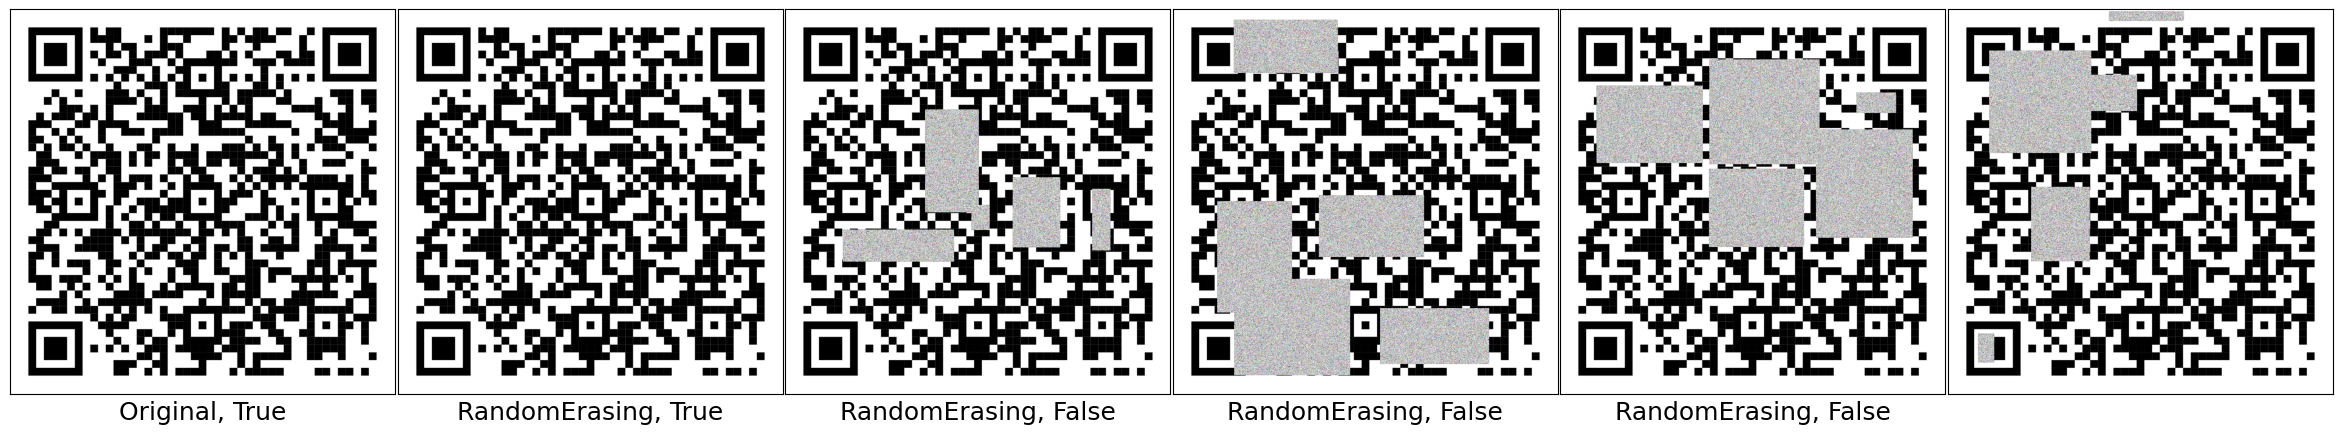

In [31]:
# RandomErasing

aug = []
n = 5
param1 = 10
param2 = (0.5, 0.5)
random_erasing = A.Compose([A.CoarseDropout(max_holes=5, max_height=320, max_width=320, min_height=16, min_width=16, fill_value='random', p=0.5)])

aug_img = []

for i in range(n):
    aug_img.append(random_erasing(image=np_image))

fig, ax = plt.subplots(1, 1+n, figsize=(5+5*n, 5))
plt.subplots_adjust(wspace=0)
plt.rcParams["font.size"] = 18
[ax[i].tick_params(bottom=False, left=False, right=False, top=False, labelbottom=False, labelleft=False, labelright=False, labeltop=False) for i in range(1+n)]

ax[0].set_xlabel("Original, {}".format(read_qr_code(Image.fromarray(np_image))))
for i in range(1, n):
    ax[i].set_xlabel("RandomErasing, {}".format(read_qr_code(Image.fromarray(aug_img[i]['image']))))

ax[0].imshow(np_image)	
[ax[i+1].imshow(aug_img[i]['image']) for i in range(n)]